In [45]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [46]:
# Load the data from the CSV file
data = pd.read_csv('advertising_data.csv')


In [47]:
# Convert the Month_year column to datetime and extract month and year as separate columns
data['Month_year'] = pd.to_datetime(data['Month_year'], format='%Y-%m')
data['Month'] = data['Month_year'].dt.month
data['Year'] = data['Month_year'].dt.year

In [48]:
# Create dummy variables for the month column -- this will help it account for seasonality
dummy_cols = pd.get_dummies(data['Month'], prefix='Month')

In [49]:
# Combine the dummy variables with the original data
data = pd.concat([data, dummy_cols], axis=1)
display(data.head(5))

,Month_year,Budget,Traffic_Visits,Shopping_Visits,shopping_Rate,Month,Year,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,2022-04-01,182097.1045,41112,31158,0.0060,4,2022,0,0,0,1,0,0,0,0,0,0,0,0
1,2022-05-01,203678.9720,46976,35475,0.0068,5,2022,0,0,0,0,1,0,0,0,0,0,0,0
2,2022-06-01,575099.4192,62730,44691,0.0023,6,2022,0,0,0,0,0,1,0,0,0,0,0,0
3,2022-07-01,718704.5380,268470,49626,0.0021,7,2022,0,0,0,0,0,0,1,0,0,0,0,0
4,2022-08-01,564727.5561,70983,48114,0.0021,8,2022,0,0,0,0,0,0,0,1,0,0,0,0


In [50]:
#exclude JULY 2022
data = data[data['Month_year'] != pd.to_datetime('2022-07-01')]

In [51]:
# Split the data into X (predictors) and y (target variables)
X = data[['Budget'] + list(dummy_cols.columns)]
y_traffic = data[['Traffic_Visits']]
y_shopping_visits = data[['Shopping_Visits']]
y_shopping_rate = data[['shopping_Rate']]

In [52]:
model_traffic = LinearRegression()
model_shopping_visits = LinearRegression()
model_shopping_rate = LinearRegression()

In [53]:
model_traffic.fit(X, y_traffic)
model_shopping_visits.fit(X, y_shopping_visits)
model_shopping_rate.fit(X, y_shopping_rate)

LinearRegression()

In [54]:
formulas = []
for i, (model, col) in enumerate(zip([model_traffic, model_shopping_visits, model_shopping_rate], [y_traffic, y_shopping_visits, y_shopping_rate])):
    formula = 'y = {:.2f} + {:.2f}*Budget'.format(model.intercept_[0], model.coef_[0][0])
    for j, dummy_col in enumerate(dummy_cols.columns):
        formula += ' + {:.2f}*{}'.format(model.coef_[0][j+1], dummy_col)
    formulas.append(formula)
    print()
    print('Formula for', col.columns[0], ':', formula)


Formula for Traffic_Visits : y = 24859.72 + 0.07*Budget + -2671.65*Month_1 + -7625.90*Month_2 + -703.72*Month_3 + 2668.04*Month_4 + 6922.05*Month_5 + -5031.50*Month_6 + 0.00*Month_7 + 3995.23*Month_8 + 6612.96*Month_9 + 3859.20*Month_10 + -2709.94*Month_11 + -5314.76*Month_12

Formula for Shopping_Visits : y = 26913.85 + 0.04*Budget + 347.60*Month_1 + -5262.68*Month_2 + 3586.95*Month_3 + -2367.30*Month_4 + 1166.12*Month_5 + -3103.14*Month_6 + 0.00*Month_7 + 696.43*Month_8 + 34.64*Month_9 + 4930.19*Month_10 + 249.03*Month_11 + -277.82*Month_12

Formula for shopping_Rate : y = 0.01 + -0.00*Budget + 0.00*Month_1 + -0.00*Month_2 + 0.00*Month_3 + 0.00*Month_4 + 0.00*Month_5 + 0.00*Month_6 + 0.00*Month_7 + -0.00*Month_8 + -0.00*Month_9 + 0.00*Month_10 + -0.00*Month_11 + 0.00*Month_12


In [55]:
# Make predictions on the data and calculate metrics for each target variable
for i, (model, col) in enumerate(zip([model_traffic, model_shopping_visits, model_shopping_rate], [y_traffic, y_shopping_visits, y_shopping_rate])):
    y_pred = model.predict(X)
    print(col.columns[0])
    print('R-squared:', r2_score(col, y_pred))
    print('MSE:', mean_squared_error(col, y_pred), '\n')


Traffic_Visits
R-squared: 1.0
MSE: 4.3314184802776725e-23 

Shopping_Visits
R-squared: 1.0
MSE: 6.0158590003856556e-24 

shopping_Rate
R-squared: 1.0
MSE: 1.0429840785477752e-36 



In [56]:
# Forecast for the next 12 months based on the available budget
#future_budget = pd.DataFrame({'Budget': [5000]*12})
#future_months = pd.date_range(start='2023-04-01', end='2024-03-01', freq='MS')
#future_dummy_cols = pd.get_dummies(future_months.month, prefix='Month')
#future_X = pd.concat([future_budget, future_dummy_cols], axis=1)
#future_y_pred = model.predict(future_X)

In [57]:
# Define a list of budget values for each of the 12 future months
future_budget = [245700.30, 253890.86, 245700.30, 253890.86, 253980.86, 245700.3, 253890.86, 245700.3, 253890.86, 253890.86, 237515.72, 253926.86]

# Create a DataFrame with the budget values and the corresponding months
future_data = pd.DataFrame({'Month_year': pd.date_range(start='2023-04-01', end='2024-03-01', freq='MS'),
                            'Budget': future_budget})

# Extract the month and year as separate columns
future_data['Month'] = future_data['Month_year'].dt.month
future_data['Year'] = future_data['Month_year'].dt.year

# Create dummy variables for the month column
future_dummy_cols = pd.get_dummies(future_data['Month'], prefix='Month')

# Combine the dummy variables with the budget values
future_X = pd.concat([future_data[['Budget']], future_dummy_cols], axis=1)
# Make predictions based on the future budget values for each target variable
future_y_pred_traffic = model_traffic.predict(future_X)
future_y_pred_shopping_visits = model_shopping_visits.predict(future_X)
future_y_pred_shopping_rate = model_shopping_rate.predict(future_X)

# Create a DataFrame with the predicted values and the corresponding months for each target variable
future_df_traffic = pd.DataFrame({'Month_year': future_data['Month_year'], 'Traffic_Visits': future_y_pred_traffic[:,0]})
future_df_shopping_visits = pd.DataFrame({'Month_year': future_data['Month_year'], 'Shopping_Visits': future_y_pred_shopping_visits[:,0]})
future_df_shopping_rate = pd.DataFrame({'Month_year': future_data['Month_year'], 'shopping_Rate': future_y_pred_shopping_rate[:,0]})

# Merge the separate DataFrames into a single DataFrame
future_df = future_df_traffic.merge(future_df_shopping_visits, on='Month_year').merge(future_df_shopping_rate, on='Month_year')

display(future_df)


,Month_year,Traffic_Visits,Shopping_Visits,shopping_Rate
0,2023-04-01,45856.728059,33467.258616,0.005381
1,2023-05-01,50721.751326,37298.056752,0.006311
2,2023-06-01,38157.189921,32731.416081,0.005505
3,2023-07-01,43799.697068,36131.936932,0.005139
4,2023-08-01,47801.640061,36831.634708,0.005124
5,2023-09-01,49801.646964,35869.200401,0.004378
6,2023-10-01,47658.898240,41062.123547,0.005486
7,2023-11-01,40478.752931,36083.586376,0.004262
8,2023-12-01,38484.932742,35854.114898,0.005189
9,2024-01-01,41128.043298,36479.532758,0.005416


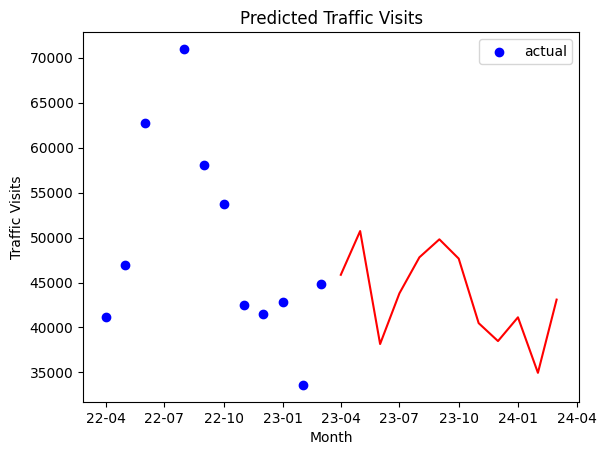

In [58]:
# Plot the predicted values for Traffic_Visits
from matplotlib import dates as mdates
plt.figure()
plt.scatter(data['Month_year'], data['Traffic_Visits'], color='blue')
plt.plot(future_df['Month_year'], future_df['Traffic_Visits'], color='red')
plt.title('Predicted Traffic Visits')
plt.xlabel('Month')
plt.ylabel('Traffic Visits')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
plt.legend(['actual'])
plt.show()


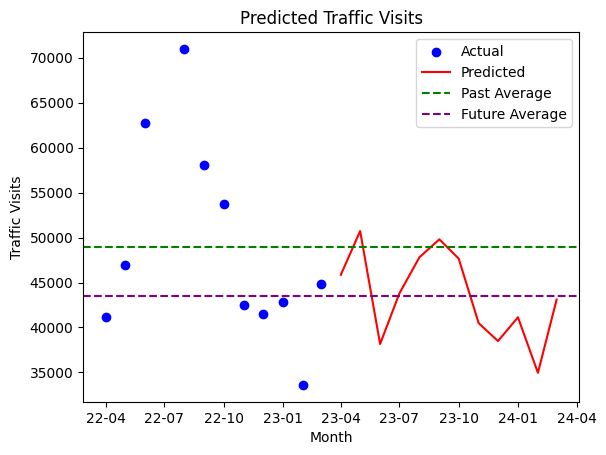

Past Average: 48977.181818181816
Future Average: 43495.014171416


In [59]:
# Calculate the average of past values
past_avg = np.mean(data['Traffic_Visits'])

# Calculate the average of future values
future_avg = np.mean(future_df['Traffic_Visits'])

# Plot the predicted values for Traffic_Visits
plt.figure()
plt.scatter(data['Month_year'], data['Traffic_Visits'], color='blue')
plt.plot(future_df['Month_year'], future_df['Traffic_Visits'], color='red')
plt.axhline(y=past_avg, color='green', linestyle='--')
plt.axhline(y=future_avg, color='purple', linestyle='--')
plt.title('Predicted Traffic Visits')
plt.xlabel('Month')
plt.ylabel('Traffic Visits')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
plt.legend(['Actual', 'Predicted', 'Past Average', 'Future Average'])
plt.show()

# Print the average value
print('Past Average:', past_avg)
print('Future Average:', future_avg)

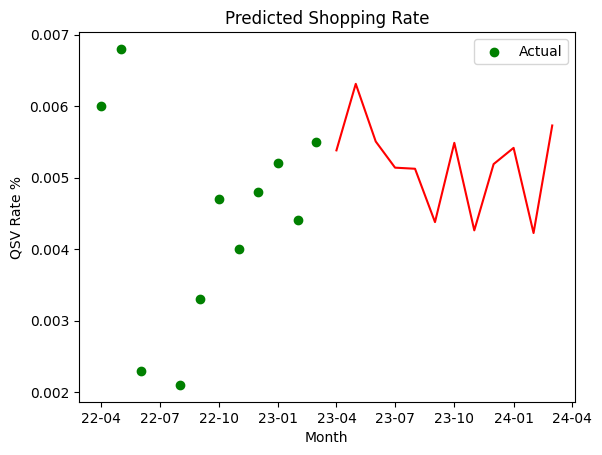

In [60]:
# Plot the predicted values for Shopping_Visits
plt.figure()
plt.scatter(data['Month_year'], data['shopping_Rate'], color='green')
plt.plot(future_df['Month_year'], future_df['shopping_Rate'], color='red')
plt.title('Predicted Shopping Rate')
plt.xlabel('Month')
plt.ylabel('QSV Rate %')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))
plt.legend(['Actual'])
plt.show()